In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from scipy.stats import chi2_contingency

In [72]:
df = pd.read_excel('sales_data_sample.xlsx', sheet_name="saledata")
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,COUNTRY,DEALSIZE,Discount,Profit
0,10107,30,2,2871.00,2003-02-24,Shipped,USA,Small,0.00,41.9136
1,10121,34,5,2765.90,2003-05-07,Shipped,France,Small,0.00,219.5820
2,10134,41,2,3884.34,2003-07-01,Shipped,France,Medium,0.00,6.8714
3,10145,45,6,3746.70,2003-08-25,Shipped,USA,Medium,0.45,-383.0310
4,10159,49,14,5205.27,2003-10-10,Shipped,USA,Medium,0.20,2.5164


In [74]:
# Tính toán giá trị trung bình và độ lệch chuẩn của cột SALES
mean_sales = df['SALES'].mean()
std_sales = df['SALES'].std()

# Giá trị Z-Score
z_score_value = 0.25

# Tính giá trị trước chuẩn hóa
x_before_scaling = z_score_value * std_sales + mean_sales
print(f"Giá trị trước chuẩn hóa là: {x_before_scaling}")

Giá trị trước chuẩn hóa là: 4014.3553483443616


In [75]:
# Tạo bảng tần suất giữa trạng thái giao hàng và kích thước đặt hàng
contingency_table = pd.crosstab(df['STATUS'], df['DEALSIZE'])

# Thực hiện kiểm định Chi-squared
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# In kết quả
print(f"Chi-squared: {chi2}")
print(f"p-value: {p_value}")

# Kiểm tra mối liên hệ dựa trên giá trị p-value (thường so sánh với mức ý nghĩa alpha = 0.05)
if p_value < 0.05:
    print("Có mối liên hệ giữa trạng thái giao hàng và kích thước đặt hàng.")
else:
    print("Không có mối liên hệ giữa trạng thái giao hàng và kích thước đặt hàng.")

Chi-squared: 34.344354882679596
p-value: 0.0001614574648411617
Có mối liên hệ giữa trạng thái giao hàng và kích thước đặt hàng.


In [76]:
# Tính toán giá trị trung bình và độ lệch chuẩn của cột SALES
mean_sales = df['SALES'].mean()
std_sales = df['SALES'].std()

# Giá trị SALES cần chuẩn hóa
sales_value = 10000

# Tính Z-Score
z_score_value = (sales_value - mean_sales) / std_sales
print(f"Giá trị Z-Score sau khi chuẩn hóa: {z_score_value}")

Giá trị Z-Score sau khi chuẩn hóa: 3.499773630545118


In [77]:
# Tính độ lệch chuẩn của SALES trên từng nhóm DEALSIZE
std_per_dealsize = df.groupby('DEALSIZE')['SALES'].std()

# In kết quả
print(std_per_dealsize)

DEALSIZE
Large     1294.739895
Medium    1047.090148
Small      577.183322
Name: SALES, dtype: float64


In [78]:
from sklearn.preprocessing import MaxAbsScaler
# Tính giá trị trung bình và độ lệch chuẩn của cột SALES
mean_sales = df['SALES'].mean()
std_sales = df['SALES'].std()

# Áp dụng Z-Score Scaler cho cột SALES
df['SALES_ZSCORE'] = (df['SALES'] - mean_sales) / std_sales

# Áp dụng Max Absolute Scaler
max_abs_scaler = MaxAbsScaler()
df['SALES_SCALED'] = max_abs_scaler.fit_transform(df[['SALES_ZSCORE']])

# Lấy giá trị tại index 100
scaled_value = df.loc[100, 'SALES_SCALED']
print(f"Giá trị sau khi scale tại index 100: {scaled_value}")

Giá trị sau khi scale tại index 100: -0.05354391121357394


C:\Users\Admin\AppData\Local\Temp\ipykernel_19044\1726855791.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='DEALSIZE', y='SALES', palette='Set3')


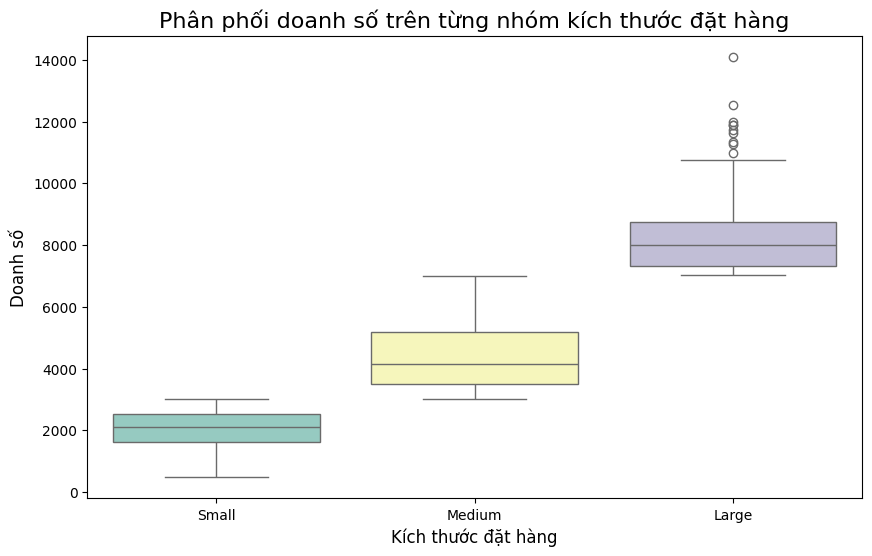

In [79]:
# Vẽ biểu đồ boxplot về doanh số trên từng nhóm kích thước đặt hàng
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='DEALSIZE', y='SALES', palette='Set3')
plt.title('Phân phối doanh số trên từng nhóm kích thước đặt hàng', fontsize=16)
plt.xlabel('Kích thước đặt hàng', fontsize=12)
plt.ylabel('Doanh số', fontsize=12)
plt.show()

In [80]:
from scipy.stats import f_oneway
# Tạo danh sách các giá trị SALES cho từng nhóm STATUS
groups = [df[df['STATUS'] == status]['SALES'] for status in df['STATUS'].unique()]

# Thực hiện kiểm định ANOVA
f_stat, p_value = f_oneway(*groups)

# In kết quả kiểm định ANOVA
print(f"F-statistic: {f_stat}")
print(f"p-value: {p_value}")

# Kiểm tra mối liên hệ dựa trên giá trị p-value (thường so sánh với alpha = 0.05)
if p_value < 0.05:
    print("Có mối phụ thuộc giữa trạng thái giao hàng và giá trị đặt hàng.")
else:
    print("Không có mối phụ thuộc giữa trạng thái giao hàng và giá trị đặt hàng.")

F-statistic: 3.506652356165296
p-value: 0.0036611658094056958
Có mối phụ thuộc giữa trạng thái giao hàng và giá trị đặt hàng.


C:\Users\Admin\AppData\Local\Temp\ipykernel_19044\1707908686.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='STATUS', y='SALES', palette='Set2')


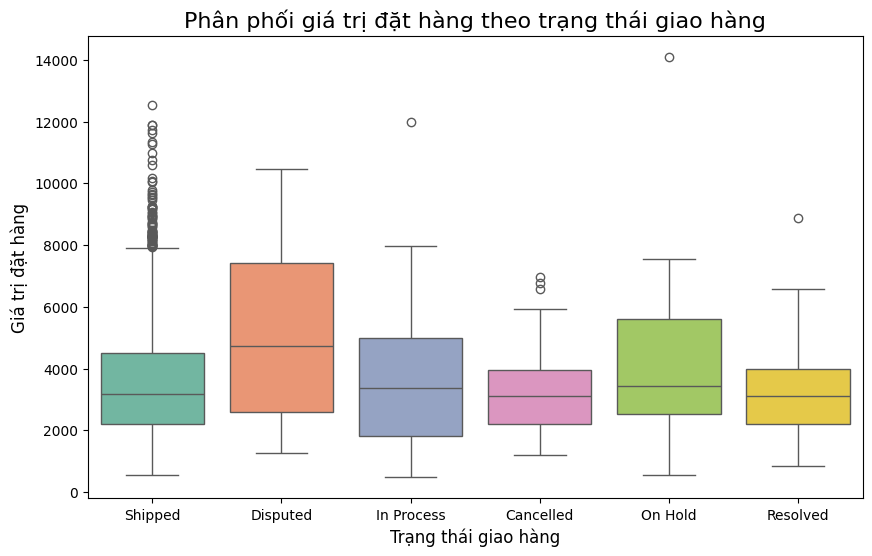

In [81]:
# Vẽ boxplot giữa trạng thái giao hàng và giá trị SALES
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='STATUS', y='SALES', palette='Set2')
plt.title('Phân phối giá trị đặt hàng theo trạng thái giao hàng', fontsize=16)
plt.xlabel('Trạng thái giao hàng', fontsize=12)
plt.ylabel('Giá trị đặt hàng', fontsize=12)
plt.show()

In [82]:
from scipy.stats import kurtosis
# Tính toán hệ số kurtosis cho cột SALES
kurtosis_value = kurtosis(df['SALES'])

print(f"Kurtosis của giá trị đặt hàng: {kurtosis_value}")

Kurtosis của giá trị đặt hàng: 1.7873782707746377


In [83]:
# Tính giá trị trung bình của SALES
mean_sales = df['SALES'].mean()

# Tính độ lệch (mean deviation)
mean_deviation = (df['SALES'] - mean_sales).abs().mean()

print(f"Độ lệch của giá trị đặt hàng: {mean_deviation}")

Độ lệch của giá trị đặt hàng: 1429.012755231965


In [84]:
# Đếm số lượng quốc gia duy nhất trong cột COUNTRY
unique_countries = df['COUNTRY'].nunique()

print(f"Số lượng quốc gia đặt hàng tại công ty ABC: {unique_countries}")

Số lượng quốc gia đặt hàng tại công ty ABC: 19


In [85]:
from sklearn.preprocessing import MinMaxScaler
# Tạo đối tượng MinMaxScaler
scaler = MinMaxScaler()

# Reshape dữ liệu để phù hợp với MinMaxScaler
sales_reshaped = df[['SALES']]

# Fit và transform dữ liệu
scaled_sales = scaler.fit_transform(sales_reshaped)

# Thêm giá trị đã được scale vào DataFrame
df['SALES_SCALED'] = scaled_sales

# Lấy giá trị đã scale tại index từ 50 đến 59
scaled_values = df.loc[50:59, 'SALES_SCALED']
print(f"Giá trị SALES đã được scale từ index 50 đến 59:\n{scaled_values}")

Giá trị SALES đã được scale từ index 50 đến 59:
50    0.571492
51    0.142230
52    0.268965
53    0.846934
54    0.251044
55    0.169972
56    0.207757
57    0.346367
58    0.333417
59    0.233724
Name: SALES_SCALED, dtype: float64


In [86]:
# Tính toán các biến transform
df['SALES_LOG'] = np.log(df['SALES'])
df['SALES_SQRT'] = np.sqrt(df['SALES'])
df['SALES_SQUARE'] = df['SALES'] ** 2
df['SALES_CUBE_ROOT'] = np.cbrt(df['SALES'])

# Tính độ lệch chuẩn cho từng biến
std_devs = {
    'log': df['SALES_LOG'].std(),
    'sqrt': df['SALES_SQRT'].std(),
    'square': df['SALES_SQUARE'].std(),
    'cube_root': df['SALES_CUBE_ROOT'].std()
}

# Sắp xếp độ lệch chuẩn theo thứ tự giảm dần
sorted_std_devs = sorted(std_devs.items(), key=lambda x: x[1], reverse=True)

# In kết quả
print("Mức độ lệch của SALES sau khi được transform:")
for transformation, std_dev in sorted_std_devs:
    print(f"{transformation}: {std_dev}")

Mức độ lệch của SALES sau khi được transform:
square: 17833172.428262636
sqrt: 14.840400823734157
cube_root: 2.546307769752096
log: 0.5213241826022744


In [87]:
# Lấy kích thước của DataFrame
data_shape = df.shape
print(f"Kích thước của dữ liệu: {data_shape[0]} hàng, {data_shape[1]} cột")
df

Kích thước của dữ liệu: 2823 hàng, 16 cột


,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,COUNTRY,DEALSIZE,Discount,Profit,SALES_ZSCORE,SALES_SCALED,SALES_LOG,SALES_SQRT,SALES_SQUARE,SALES_CUBE_ROOT
0,10107,30,2,2871.00,2003-02-24,Shipped,USA,Small,0.00,41.9136,-0.370760,0.175644,7.962416,53.581713,8.242641e+06,14.212737
1,10121,34,5,2765.90,2003-05-07,Shipped,France,Small,0.00,219.5820,-0.427821,0.167916,7.925121,52.591824,7.650203e+06,14.037146
2,10134,41,2,3884.34,2003-07-01,Shipped,France,Medium,0.00,6.8714,0.179411,0.250150,8.264708,62.324474,1.508810e+07,15.719513
3,10145,45,6,3746.70,2003-08-25,Shipped,USA,Medium,0.45,-383.0310,0.104682,0.240030,8.228631,61.210293,1.403776e+07,15.531604
4,10159,49,14,5205.27,2003-10-10,Shipped,USA,Medium,0.20,2.5164,0.896581,0.347273,8.557427,72.147557,2.709484e+07,17.330633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,15,2244.40,2004-12-02,Shipped,Spain,Small,0.00,315.7404,-0.710958,0.129572,7.716194,47.375099,5.037331e+06,13.092827
2819,10373,29,1,3978.51,2005-01-31,Shipped,Finland,Medium,0.20,2.3520,0.230539,0.257074,8.288663,63.075431,1.582854e+07,15.845532
2820,10386,43,4,5417.57,2005-03-01,Resolved,Spain,Medium,0.20,7.4694,1.011844,0.362882,8.597403,73.604144,2.935006e+07,17.563114
2821,10397,34,1,2116.16,2005-03-28,Shipped,France,Small,0.20,22.6782,-0.780583,0.120143,7.657358,46.001739,4.478133e+06,12.838556


In [88]:
# Nhóm dữ liệu theo quốc gia và tính tổng doanh số
total_sales_by_country = df.groupby('COUNTRY')['SALES'].sum()

# Sắp xếp tổng doanh số theo thứ tự giảm dần và lấy quốc gia ở vị trí thứ 5
fifth_country = total_sales_by_country.sort_values(ascending=False).index[4]
fifth_country_sales = total_sales_by_country.sort_values(ascending=False).iloc[4]

print(f"Quốc gia có tổng doanh số đặt hàng đứng ở vị trí thứ 5 là: {fifth_country} với tổng doanh số là: {fifth_country_sales}")

Quốc gia có tổng doanh số đặt hàng đứng ở vị trí thứ 5 là: UK với tổng doanh số là: 478880.46
